In [ ]:
# Step 1: Install dependencies
# pip install pandas scikit-learn nltk

import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import string



In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
# Access the uploaded file from the 'uploaded' dictionary
df = pd.read_csv(list(uploaded.keys())[0]) # Access the filename from the uploaded dictionary
# list(uploaded.keys())[0] returns the name of the first uploaded file
df.head()

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
if 'question' not in df.columns or 'answer' not in df.columns:
    raise ValueError("CSV must contain 'question' and 'answer' columns.")

questions = df['question'].astype(str).tolist()
answers = df['answer'].astype(str).tolist()

# Step 3: Preprocess the questions
def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

processed_questions = [preprocess(q) for q in questions]

# Step 4: Create a TF-IDF model
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_questions)

# Step 5: Build the chatbot logic
def chatbot_response(user_input):
    user_input_processed = preprocess(user_input)
    user_vec = vectorizer.transform([user_input_processed])
    similarity = cosine_similarity(user_vec, X)
    idx = similarity.argmax()

    if similarity[0, idx] > 0.2:  # Threshold to decide if the answer is relevant
        return answers[idx]
    else:
        return "I'm sorry, I couldn't find an answer to your question. Please try rephrasing it."

# Step 6: Chat interface
def chat():
    print("Hello! I am your customer support assistant. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break
        response = chatbot_response(user_input)
        print(f"Chatbot: {response}")

# Step 7: Run the chatbot
chat()

Hello! I am your customer support assistant. Type 'exit' to quit.


In [ ]:
print("\nData types of columns:")
print(df.dtypes)
print("\nShape of the dataset:")
print(df.shape)
print("\nMissing values:")
print(df.isnull().sum())


Data types of columns:
Unnamed: 0     int64
question      object
answer        object
dtype: object

Shape of the dataset:
(3725, 3)

Missing values:
Unnamed: 0    0
question      0
answer        0
dtype: int64


<ipython-input-29-9e8363f6d051>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feature_importances, y=top_feature_names, palette="viridis")


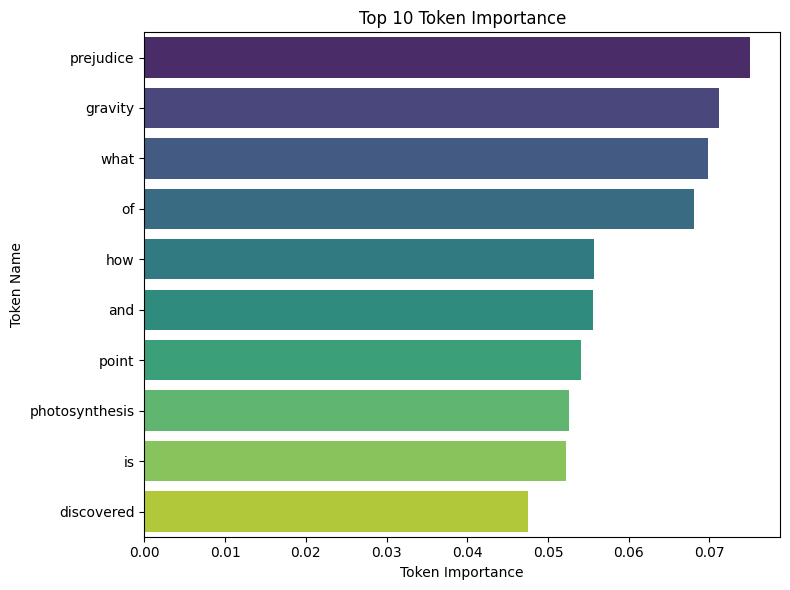

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data (replace these with your actual data)
processed_questions = [
    "What is the capital of France?",
    "How does photosynthesis work?",
    "Who wrote 'Pride and Prejudice'?",
    "What is the boiling point of water?",
    "Who discovered gravity?"
]
answers = ["Paris", "Process", "Jane Austen", "100C", "Newton"]

# Create a pipeline
Pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline
Pipe.fit(processed_questions, answers)

# Visualize Feature Importance
if isinstance(Pipe.named_steps['classifier'], RandomForestClassifier):
    feature_importances = Pipe.named_steps['classifier'].feature_importances_
    feature_names = Pipe.named_steps['tfidf'].get_feature_names_out()

    # Sort feature importances
    sorted_indices = feature_importances.argsort()[::-1]
    top_feature_importances = feature_importances[sorted_indices][:10]
    top_feature_names = np.array(feature_names)[sorted_indices][:10]

    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_feature_importances, y=top_feature_names, palette="viridis")
    plt.xlabel('Token Importance')
    plt.ylabel('Token Name')
    plt.title('Top 10 Token Importance')
    plt.tight_layout()
    plt.show()


Saving Conversation1.csv.csv to Conversation1.csv (2).csv


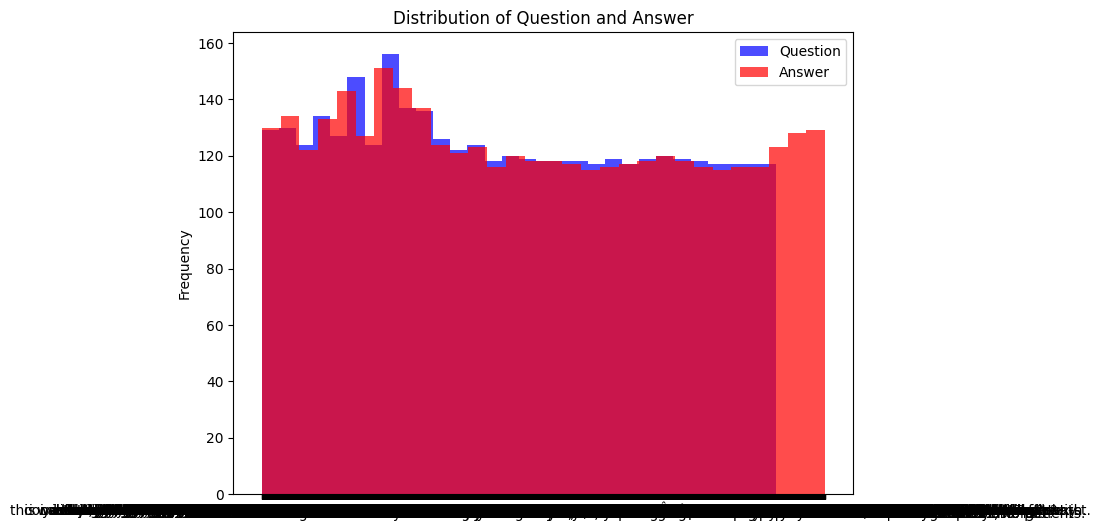

In [ ]:
# Visualization
import matplotlib.pyplot as plt # Import matplotlib.pyplot to define 'plt'
import pandas as pd
from google.colab import files

# Assuming your CSV file is named 'your_file.csv'
# Replace 'your_file.csv' with the actual filename
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])


plt.figure(figsize=(8, 6))
plt.hist(df['question'], bins=30, alpha=0.7, color='blue', label='Question')
plt.hist(df['answer'], bins=30, alpha=0.7, color='red', label='Answer')
plt.title('Distribution of Question and Answer')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# !pip install tensorflow -q

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Attention, Concatenate

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import unicodedata


nltk.download('punkt')

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')

# Function for preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = unicode_to_ascii(text.lower().strip())
    text = re.sub("(\\W)"," ",text)
    text = re.sub('\S*\d\S*\s*','', text)
    text =  "<sos> " +  text + "<eos>"
    return text

# Apply preprocessing to question and answer columns
preprocessed_df = df.copy()
preprocessed_df['question'] = preprocessed_df['question'].apply(preprocess_text)
preprocessed_df['answer'] = preprocessed_df['answer'].apply(preprocess_text)

# Print the preprocessed DataFrame
preprocessed_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,question,answer
0,0,<sos> hi how are you doing <eos>,<sos> i m fine how about yourself <eos>
1,1,<sos> i m fine how about yourself <eos>,<sos> i m pretty good thanks for asking <eos>
2,2,<sos> i m pretty good thanks for asking <eos>,<sos> no problem so how have you been <eos>
3,3,<sos> no problem so how have you been <eos>,<sos> i ve been great what about you <eos>
4,4,<sos> i ve been great what about you <eos>,<sos> i ve been good i m in school right now ...
...,...,...,...
3720,3720,<sos> that s a good question maybe it s not o...,<sos> are you right handed <eos>
3721,3721,<sos> are you right handed <eos>,<sos> yes all my life <eos>
3722,3722,<sos> yes all my life <eos>,<sos> you re wearing out your right hand stop...
3723,3723,<sos> you re wearing out your right hand stop...,<sos> but i do all my writing with my right ha...


Tokenizer:

In [ ]:
# Preprocessing the data
questions = preprocessed_df['question'].values.tolist()
answers = preprocessed_df['answer'].values.tolist()

# Tokenizing the data
tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(np.concatenate((questions, answers), axis=0))

vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
question_seqs = tokenizer.texts_to_sequences(questions)
answer_seqs = tokenizer.texts_to_sequences(answers)

# Padding sequences for equal length
# Pad sequences for equal length
max_len_question = max(len(seq) for seq in question_seqs)
max_len_answer = max(len(seq) for seq in answer_seqs)
max_len = max(max_len_question, max_len_answer)
print(max(max_len_question, max_len_answer))
# Pad sequences separately for questions and answers
question_seqs = pad_sequences(question_seqs, maxlen=max_len, padding='post')
answer_seqs = pad_sequences(answer_seqs, maxlen=max_len, padding='post')

22


In [ ]:
tokenizer.texts_to_sequences("<sos>")

[[], [9], [490], [9], []]

In [ ]:
tokenizer.word_index["<sos>"]


1